In [ ]:
import pandas as pd
import numpy as np
#!pip install matplotlib
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns

from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

from sklearn.preprocessing import PowerTransformer

#!pip install umap
import umap

# Import module for data visualization
#!pip install plotnine
from plotnine import *
import plotnine
# Import module for k-protoype cluster
#!pip install kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import joblib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [7]:
df = pd.read_csv('full_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   hh_id                   222744 non-null  int64  
 1   ind_id                  222744 non-null  int64  
 2   trip_id                 222744 non-null  int64  
 3   temp                    222709 non-null  float64
 4   feelslike               222709 non-null  float64
 5   precip                  222709 non-null  float64
 6   date                    222744 non-null  object 
 7   origin                  222744 non-null  int64  
 8   start_time              222744 non-null  int64  
 9   destination             222744 non-null  int64  
 10  arrival_time            222744 non-null  int64  
 11  travel_freq             222744 non-null  int64  
 12  pv_for_trip.            222741 non-null  float64
 13  why_not_pv              105803 non-null  float64
 14  why_not_public_t    

In [8]:
cluster_df = df.iloc[:, [19,21,31,53,54,55,56,57,58,60,61,34,35,51,65]]
cat_col = [0,1,2,3,4,5,6,7,8,9,10]
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   sex                     222744 non-null  int64
 1   spanish                 222744 non-null  int64
 2   mobility_issue          222744 non-null  int64
 3   main_activity_group     222744 non-null  int64
 4   prof_status_group       222744 non-null  int64
 5   driving_license_binary  222744 non-null  int64
 6   educ_group              222744 non-null  int64
 7   transport_card_binary   222744 non-null  int64
 8   age_group               222744 non-null  int64
 9   electric.               222744 non-null  int64
 10  private_parking.        222744 non-null  int64
 11  pp_4age_hh              222744 non-null  int64
 12  vehicles_hh             222744 non-null  int64
 13  trips_hh                222744 non-null  int64
 14  ppl_hh                  222744 non-null  int64
dtype

In [9]:
# define categorical variables
cat_var = cluster_df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]
cat_var[cat_var.columns] = cat_var[cat_var.columns].astype(object)
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   sex                     222744 non-null  object
 1   spanish                 222744 non-null  object
 2   mobility_issue          222744 non-null  object
 3   main_activity_group     222744 non-null  object
 4   prof_status_group       222744 non-null  object
 5   driving_license_binary  222744 non-null  object
 6   educ_group              222744 non-null  object
 7   transport_card_binary   222744 non-null  object
 8   age_group               222744 non-null  object
 9   electric.               222744 non-null  object
 10  private_parking.        222744 non-null  object
dtypes: object(11)
memory usage: 18.7+ MB


/var/folders/g_/5d_tdxd941d_vnh_bxrk06_40000gn/T/ipykernel_31468/8585064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
num_var = cluster_df.iloc[:, [11,12,13,14]]
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   pp_4age_hh   222744 non-null  int64
 1   vehicles_hh  222744 non-null  int64
 2   trips_hh     222744 non-null  int64
 3   ppl_hh       222744 non-null  int64
dtypes: int64(4)
memory usage: 6.8 MB


In [11]:
cluster_df.iloc[:, 0:11] = cluster_df.iloc[:, 0:11].astype(object)
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   sex                     222744 non-null  object
 1   spanish                 222744 non-null  object
 2   mobility_issue          222744 non-null  object
 3   main_activity_group     222744 non-null  object
 4   prof_status_group       222744 non-null  object
 5   driving_license_binary  222744 non-null  object
 6   educ_group              222744 non-null  object
 7   transport_card_binary   222744 non-null  object
 8   age_group               222744 non-null  object
 9   electric.               222744 non-null  object
 10  private_parking.        222744 non-null  object
 11  pp_4age_hh              222744 non-null  int64 
 12  vehicles_hh             222744 non-null  int64 
 13  trips_hh                222744 non-null  int64 
 14  ppl_hh                  222744 non-n

In [12]:
#Pre-processing
kprot_data = cluster_df.copy()
for c in cluster_df.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

In [13]:
# Compute frequency (cardinality) of each categorical column
def get_cardinalities(df, cat_cols):
    card = {}
    for i in cat_cols:
        col_name = df.columns[i]
        card[i] = df[col_name].nunique()
    return card

# Custom Eskin dissimilarity
def eskin_dissim(a, b, card_map):

    # first compute similarity
    similarity = 0.0
    for i, (val_a, val_b) in enumerate(zip(a, b)):

      if np.array_equal(val_a, val_b):
            similarity += 1.0
      else:
            f = card_map[i]
            similarity += f**2 / (f**2 + 2)

    avg_similarity = similarity/ len(cardinalities)

    dissimilarity = 1 - avg_similarity

    return dissimilarity

# Adapter function for KPrototypes
def eskin_dissim_wrapper(a, b, **kwargs):
    # 'a' and 'b' are 1D arrays of categorical values
    return eskin_dissim(a, b, cardinalities)

# Compute cardinalities for current data
cardinalities = get_cardinalities(cluster_df, cat_col)

In [33]:
def bootstrap_cluster_stability(X, k_range, n_bootstraps=50, random_state=42):
    """
    Evaluate cluster stability by comparing a reference clustering (computed on the full data)
    to clustering results obtained from bootstrap samples.
    
    Parameters:
        X : ndarray of shape (n_samples, n_features)
            Input data.
        k_range : iterable
            A list or range of candidate numbers of clusters to evaluate.
        n_bootstraps : int, default=50
            The number of bootstrap iterations.
        random_state : int, default=42
            Seed for reproducibility.
            
    Returns:
        stability_scores : list
            Average ARI values for each k, measuring the stability of the clustering.
    """
    np.random.seed(random_state)
    stability_scores = []
    
    # Evaluate stability for each candidate number of clusters k.
    for k in k_range:
        # Compute reference clustering on full dataset
        kprot_ref = KPrototypes(n_clusters=k, init='Cao', random_state=22, n_jobs=-1, verbose=0, n_init=10)
        joblib.dump(kprot_ref, 'kproto_ref.joblib')
        labels_ref = kprot_ref.fit_predict(X, categorical=cat_col)
        df_labels_ref = pd.DataFrame(labels_ref, columns=['ref_cluster_label'])
        df_labels_ref.to_csv('labels_ref.csv', index=False)
        ari_scores = []
        
        # Iterate over bootstrap samples
        for i in tqdm(range(n_bootstraps)):
            n_samples = X.shape[0]
            # Generate bootstrap sample indices (sampling with replacement)
            bootstrap_idx = np.random.choice(n_samples, size=n_samples, replace=True)
            X_bootstrap = X.iloc[bootstrap_idx]
            
            # Fit KMeans on the bootstrap sample
            kprot_boot = KPrototypes(n_clusters=k, init='Cao', random_state=22, n_jobs=-1, verbose=0, n_init=10)
            kprot_boot.fit(X_bootstrap, categorical=cat_col)
            
            # Use the centroids from the bootstrap run to predict cluster labels for the full data.
            labels_boot = kprot_boot.predict(X, categorical=cat_col)
            
            # Compute similarity between reference clustering and bootstrap clustering using ARI.
            ari = adjusted_rand_score(labels_ref, labels_boot)
            ari_scores.append(ari)
        
        # Average the ARI scores over all bootstrap samples for this k.
        stability_scores.append(np.mean(ari_scores))
    
    return stability_scores




Attempt bootstrapping with standard K-Prototype with a smaller sample to check it runs properly:

In [20]:
subset_sample = cluster_df.sample(n=2000, random_state=42)

 40%|████      | 40/100 [04:43<07:33,  7.57s/it]Exception ignored in: <function ResourceTracker.__del__ at 0x10e2de160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x11142e160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks

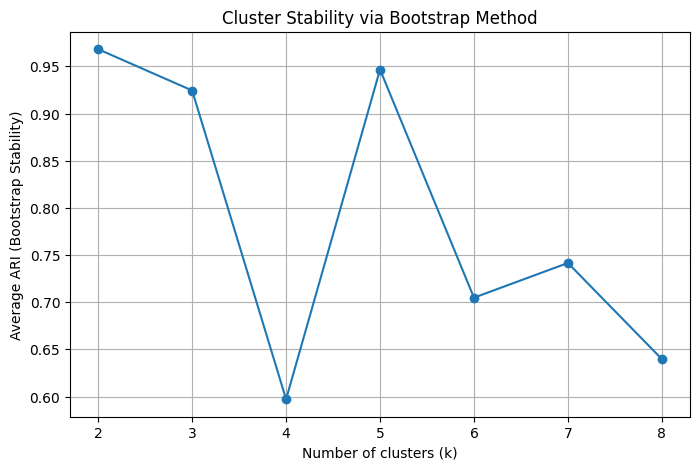

In [34]:
# Define a range of cluster numbers to test.
k_range = range(2, 9)
    
# Compute bootstrap stability (average ARI) for each number of clusters.
stability_scores = bootstrap_cluster_stability(subset_sample, k_range, n_bootstraps=100, random_state=22)
    
# Plot the average ARI (cluster stability) as a function of k.
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), stability_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average ARI (Bootstrap Stability)")
plt.title("Cluster Stability via Bootstrap Method")
plt.grid(True)
plt.show()

In [47]:
def bootstrap_cluster_stability_eskin(X, k_range, n_bootstraps=50, random_state=42):
    """
    Evaluate cluster stability by comparing a reference clustering (computed on the full data)
    to clustering results obtained from bootstrap samples.
    
    Parameters:
        X : ndarray of shape (n_samples, n_features)
            Input data.
        k_range : iterable
            A list or range of candidate numbers of clusters to evaluate.
        n_bootstraps : int, default=50
            The number of bootstrap iterations.
        random_state : int, default=42
            Seed for reproducibility.
            
    Returns:
        stability_scores : list
            Average ARI values for each k, measuring the stability of the clustering.
    """
    np.random.seed(random_state)
    stability_scores = []
    cost_means = []
    cost_stds = []
    
    # Evaluate stability for each candidate number of clusters k.
    for k in k_range:
        # Compute reference clustering on full dataset
        kprot_eskin_ref = KPrototypes(n_clusters=k, init='Cao', random_state=22, n_jobs=-1, verbose=0, n_init=10, cat_dissim = eskin_dissim_wrapper)
        joblib.dump(kprot_eskin_ref, 'kproto_ref.joblib')
        labels_eskin_ref = kprot_eskin_ref.fit_predict(X, categorical=cat_col)
        df_labels_eskin_ref = pd.DataFrame(labels_eskin_ref, columns=['ref_cluster_label'])
        df_labels_eskin_ref.to_csv('labels_eskin_ref.csv', index=False)
        ari_scores = []
        costs = []
        
        # Iterate over bootstrap samples
        for i in tqdm(range(n_bootstraps)):
            n_samples = X.shape[0]
            # Generate bootstrap sample indices (sampling with replacement)
            bootstrap_idx = np.random.choice(n_samples, size=n_samples, replace=True)
            X_bootstrap = X.iloc[bootstrap_idx]
            
            # Fit KMeans on the bootstrap sample
            kprot_eskin_boot = KPrototypes(n_clusters=k, init='Cao', random_state=22, n_jobs=-1, verbose=0, n_init=10, cat_dissim = eskin_dissim_wrapper)
            kprot_eskin_boot.fit(X_bootstrap, categorical=cat_col)
            
            # Use the centroids from the bootstrap run to predict cluster labels for the full data.
            labels_boot = kprot_eskin_boot.predict(X, categorical=cat_col)
            
            # Compute similarity between reference clustering and bootstrap clustering using ARI.
            ari = adjusted_rand_score(labels_eskin_ref, labels_boot)
            ari_scores.append(ari)

            costs.append(kprot_eskin_boot.cost_)

        
        
        # Average the ARI scores over all bootstrap samples for this k.
        stability_scores.append(np.mean(ari_scores))

        # Average cost and st dev for all bootstrap samples for this k
        cost_means.append(np.mean(costs))
        cost_stds.append(np.std(costs))
    
    return stability_scores, cost_means, cost_stds


Attempt bootstrapping based on EKP with a smaller sample to check it runs properly:

In [36]:
subset_eskin_sample = cluster_df.sample(n=2000, random_state=42)

100%|██████████| 100/100 [08:40<00:00,  5.21s/it]


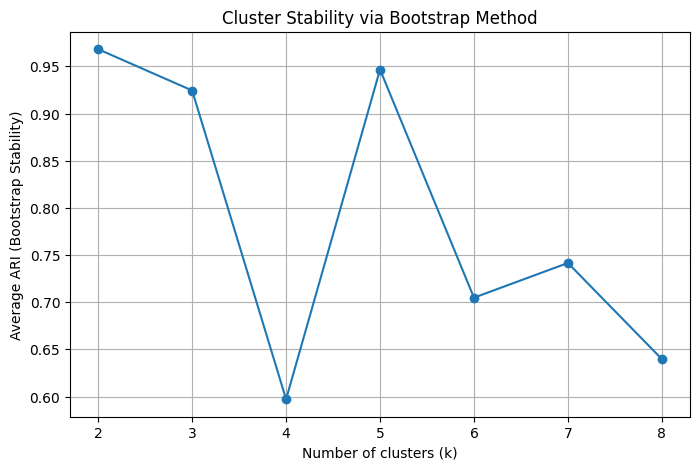

Exception ignored in: <function ResourceTracker.__del__ at 0x1042d6160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x101d76160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

In [ ]:
# Define a range of cluster numbers to test.
k_range = range(2, 9)
    
# Compute bootstrap stability (average ARI) for each number of clusters.
eskin_stability_scores = bootstrap_cluster_stability_eskin(subset_sample, k_range, n_bootstraps=100, random_state=22)
    


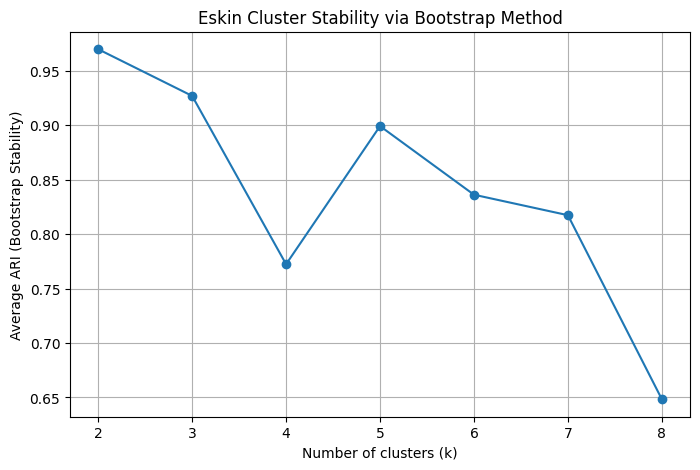

In [39]:
# Plot the average ARI (cluster stability) as a function of k.
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), eskin_stability_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average ARI (Bootstrap Stability)")
plt.title("Eskin Cluster Stability via Bootstrap Method")
plt.grid(True)
plt.show()

##### Final bootstrapping based on EKP: #####

100%|██████████| 50/50 [3:02:36<00:00, 219.12s/it]  


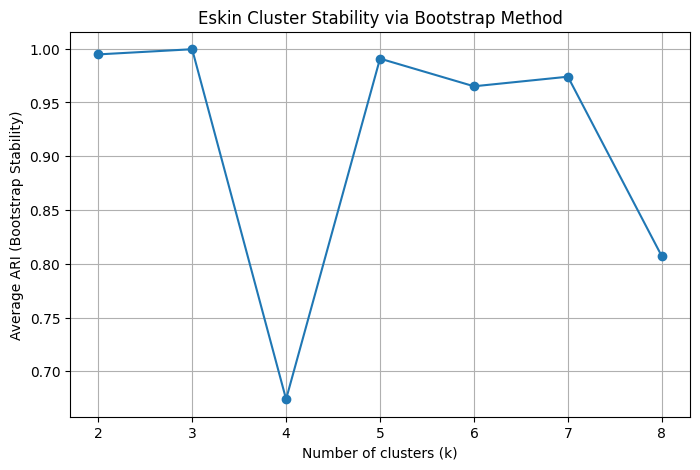

Exception ignored in: <function ResourceTracker.__del__ at 0x10cc5a160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x101fca160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

In [ ]:
subset_eskin_sample_larger = cluster_df.sample(n=50000, random_state=42)

# Define a range of cluster numbers to test.
k_range = range(2, 9)
    
# Compute bootstrap stability (average ARI) for each number of clusters.
eskin_large_stability_scores = bootstrap_cluster_stability_eskin(subset_eskin_sample_larger, k_range, n_bootstraps=50, random_state=22)
    
# Plot the average ARI (cluster stability) as a function of k.
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), eskin_large_stability_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average ARI (Bootstrap Stability)")
plt.title("Eskin Cluster Stability via Bootstrap Method")
plt.grid(True)
plt.show()

In [ ]:
subset_eskin_sample_larger = cluster_df.sample(n=50000, random_state=42)

# Define a range of cluster numbers to test.
k_range = range(2, 9)
    
# Compute bootstrap stability (average ARI) for each number of clusters.
eskin_large_stability_scores, cost_means, cost_stds = bootstrap_cluster_stability_eskin(subset_eskin_sample_larger, k_range, n_bootstraps=50, random_state=22)


# Prepare data for plotting.
#avg_costs = [cost_means[k] for k in k_range]
#std_costs = [cost_stds[k] for k in k_range]
    
# Plot the average cost with error bars indicating the standard deviation.
plt.figure(figsize=(8, 5))
plt.errorbar(list(k_range), avg_costs, yerr=std_costs, fmt='-o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average Cost (Objective Value)")
plt.title("KPrototypes Cost via Bootstrapping")
plt.grid(True)
plt.show()

100%|██████████| 50/50 [3:02:18<00:00, 218.77s/it]  


NameError: name 'avg_costs' is not defined

<Figure size 800x500 with 0 Axes>

Exception ignored in: <function ResourceTracker.__del__ at 0x10e30a160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10c03a160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/m

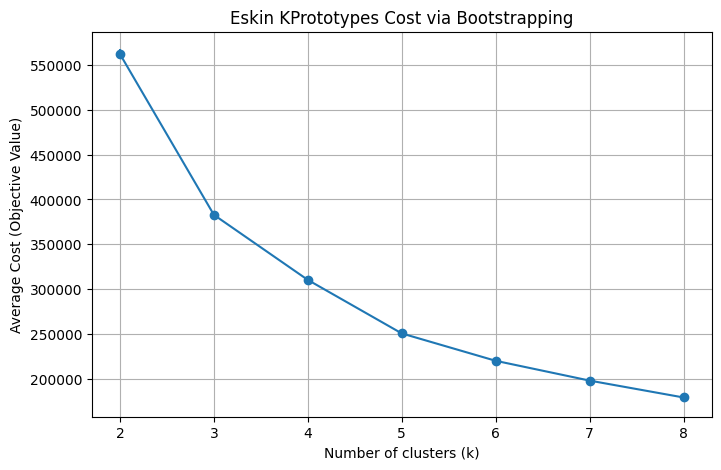

In [51]:
# Plot the average cost with error bars indicating the standard deviation.
plt.figure(figsize=(8, 5))
plt.errorbar(list(k_range), cost_means, yerr=cost_stds, fmt='-o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average Cost (Objective Value)")
plt.title("Eskin KPrototypes Cost via Bootstrapping")
plt.grid(True)
plt.show()

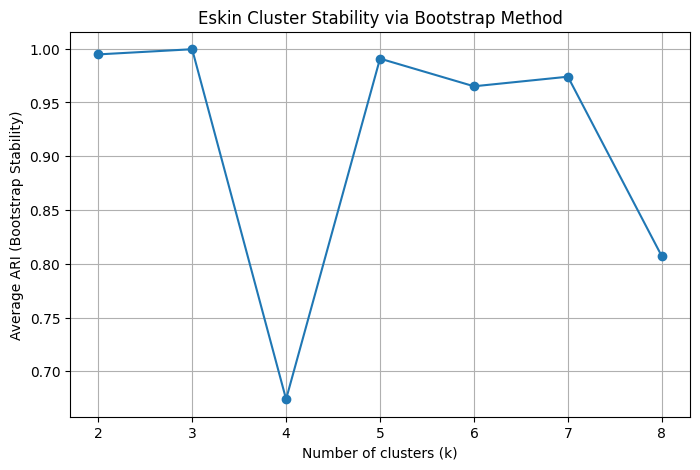

In [50]:
# Plot the average ARI (cluster stability) as a function of k.
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), eskin_large_stability_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average ARI (Bootstrap Stability)")
plt.title("Eskin Cluster Stability via Bootstrap Method")
plt.grid(True)
plt.show()

In [ ]:
#df_labels_eskin_ref = pd.DataFrame(labels_eskin_ref, columns=['ref_cluster_label'])
#df_labels_eskin_ref.to_csv('labels_eskin_ref.csv', index=False)

df_eskin_large_stability_scores = pd.DataFrame(eskin_large_stability_scores, columns=['eskin_large_stability_scores'])
df_cost_means = pd.DataFrame(cost_means, columns=['cost_means'])
df_cost_stds = pd.DataFrame(cost_stds, columns=['cost_stds'])

df_eskin_large_stability_scores.to_csv('df_eskin_large_stability_scores.csv', index=False)
df_cost_means.to_csv('df_cost_means.csv', index=False)
df_cost_stds.to_csv('df_cost_stds.csv', index=False)


eskin_large_stability_scores.to_csv('eskin_large_stability_scores.csv', index=False)
cost_means.to_csv('cost_means.csv', index=False)
cost_stds.to_csv('cost_stds.csv', index=False)